This is all the code used to generate the model and results, a few exploratory examinations of the data sets and graphs have been left out for clarity.

### 1.

I think that option D (Arrival delay greater than 15 minutes) is the most appropriate for this problem.



### 2.

In the background it is stated that the motivation for this investigation is the customer complaints about the impacts of a flight delay. This impact from the context is likely to be a missed connection or significant delay of arrival ruling out the departure based definitions. Additionally the aim is to inform the airport of this delay (which I have assumed to be the arriving airport). Delays of sub 15 minutes are unlikely to require additional attention from the receiving airport to mitigate the effects of a delay. From this, option D was the clear choice in defining what a delay constitutes.

###3.

#### a. i.

Hour of departure and arrival were used as they showed to have some impact on length of delay.

Origin and destination were used as they showed to have some impact on length of delay.

Carrier was used as certain airlines were more likely to be delayed - from which a further study could indicate why.

Overall distance of flight was used as it showed to have some impact on length of delay.

Weather conditions on intended take off was used.

Average speed required was calculated as a lower required speed could impact on time spent landing and taking off.

I chose to use the day of the week as a variable in case the change in volume of traffic at the weekend had an effect.

Departure delay was not used as although it was highly correlated it acts as data leakage as it will not be known when making the predictions, along with air time and arrival time compared to its scheduled form.

Other forms of time beyond hour were not used as information about day of week were already covered, every piece of data had the same year, and seasonality should be reflected in the weather data.

### ii.

The weekday, month, origin, destination and carrier have been chosen to be categoric because that is what they are. Hour has been merged with minute to make it continuous. All else is already continuous data.

### b

See below.

### c

The type of model was chosen as an GXBoost model. This was due to random tree based models excelling as classifiers on tabular data and additionally having a fast run speed.

### d

If you evaluate your model based on data which the model has been trained on, there is a risk that you miss your model overfitting. This is as it has been specifically tailored to that data. A separate dataset to evaluate the models performance ensures that the model works well on data that it has not seen before. This makes it useful in real world situations with new incoming data to predict something that is currently unknown.

### e

See below.

### f

Evaluation metrics were an accuracy of 78.98% and a log loss of 7.26.

### g

I would spend more time fine tuning the hyperparameters, looking for useful features to engineer out from the data, and finding more data to test and train the model on.

### 4

Recomendations:

Use the model as a guide when desgining flight routes to avoid creating a route that is prone to delays.

For the model use the most accurate weather predictions to get the most accurate predictions.

As departure delay and arrival delay are strongly correlated (see graph below) attempt to minimise departure delay as much as possible.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# this data is not useful
#airline_data = pd.read_csv('drive/MyDrive/peak_interview/data/airlines.csv')
#airport_data = pd.read_csv('drive/MyDrive/peak_interview/data/airports.csv')


flights_data = pd.read_csv('drive/MyDrive/peak_interview/data/flights.csv')
weather_data = pd.read_csv('drive/MyDrive/peak_interview/data/weather.csv')

In [9]:
flights_data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [10]:
missing_values_count = flights_data.isnull().sum()
missing_values_count

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         8713
carrier              0
flight               0
origin               0
dest                 0
air_time          8713
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [11]:
is_nan = flights_data.isnull()
nan_rows = is_nan.any(axis=1)
flights_data[nan_rows] # lots of flights with NaN apear to be duplicated the next day with a slight change so safe to just remove

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour
748,2013,1,1,2016.0,1930,46.0,NaN,2220,NaN,EV,4204,EWR,OKC,NaN,1325,19,30,2013-01-02T00:00:00Z
832,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,EWR,RDU,NaN,416,16,30,2013-01-01T21:00:00Z
833,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,LGA,DFW,NaN,1389,19,35,2013-01-02T00:00:00Z
834,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,LGA,MIA,NaN,1096,15,0,2013-01-01T20:00:00Z
835,2013,1,1,NaN,600,NaN,NaN,901,NaN,B6,125,JFK,FLL,NaN,1069,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336054,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336055,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336056,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336057,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


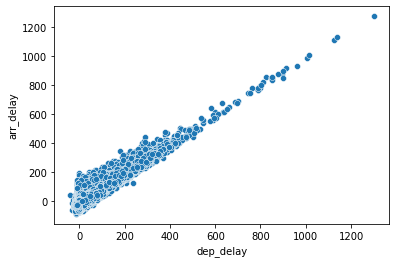

In [12]:
sns.scatterplot(x=flights_data['dep_delay'], y=flights_data['arr_delay']) # data leakage, shows a strong correlation

KeyboardInterrupt: ignored

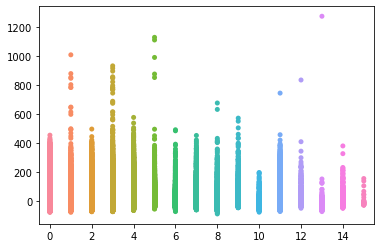

In [34]:
sns.scatterplot(x=flights_data['carrier'], y=flights_data['arr_delay'])

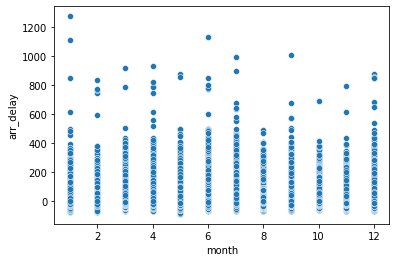

In [14]:
sns.scatterplot(x=flights_data['month'], y=flights_data['arr_delay'])

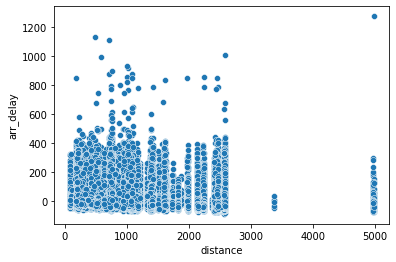

In [15]:
sns.scatterplot(x=flights_data['distance'], y=flights_data['arr_delay'])

In [16]:
flights_data = flights_data.dropna()

In [17]:
def delayed(row):
  if row.arr_delay > 15.0:
    return 1
  else:
    return 0

flights_data['delayed'] = flights_data.apply(delayed, axis = 'columns')

In [18]:
import datetime as dt

def weekday(row):
  return dt.date(row.year, row.month, row.day).weekday()

flights_data['weekday'] = flights_data.apply(weekday, axis='columns')

In [19]:
missing_values_count = weather_data.isnull().sum()
missing_values_count

origin          0
year            0
month           0
day             0
hour            0
temp            1
dewp            1
humid           1
wind_dir      460
wind_speed      4
precip          0
visib           0
time_hour       0
dtype: int64

In [20]:
weather_data['origin'].unique()

array(['EWR', 'JFK', 'LGA'], dtype=object)

In [21]:
flights_data['origin'].unique() # quick comparision to make sure they lined up

array(['EWR', 'LGA', 'JFK'], dtype=object)

In [22]:
def hour_splitter(row):
  return int( (row.sched_arr_time - int(str(row.sched_arr_time)[-2:])) / 100) 

flights_data['sched_arr_hour'] = flights_data.apply(hour_splitter, axis='columns')

def min_splitter(row):
  return int(str(row.sched_arr_time)[-2:])

flights_data['sched_arr_min'] = flights_data.apply(min_splitter, axis='columns')
flights_data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,origin,dest,air_time,distance,hour,minute,time_hour,delayed,weekday,sched_arr_hour,sched_arr_min
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z,0,1,8,19
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z,1,1,8,30
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z,1,1,8,50
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z,0,1,10,22
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z,0,1,8,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336048,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,JFK,SYR,41.0,209,22,45,2013-10-01T02:00:00Z,0,0,23,51
336049,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,JFK,BUF,52.0,301,22,50,2013-10-01T02:00:00Z,0,0,0,7
336050,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,JFK,ROC,47.0,264,22,46,2013-10-01T02:00:00Z,0,0,0,1
336051,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,JFK,BOS,33.0,187,22,55,2013-10-01T02:00:00Z,0,0,23,58


In [23]:
def av_req_speed(row):
  return row.distance * 60 / (dt.datetime(row.year,row.month,row.day,row.sched_arr_hour,row.sched_arr_min) - dt.datetime(row.year,row.month,row.day,row.hour,row.minute)).seconds

flights_data['av_req_speed'] = flights_data.apply(av_req_speed, axis='columns')

In [24]:
def con_hour_dep(row):
  return row.hour + (row.minute/60)

def con_hour_arr(row):
  return row.sched_arr_hour + (row.sched_arr_min/60)

flights_data['sched_arr_hour'] = flights_data.apply(con_hour_arr, axis='columns')

In [25]:
left = flights_data.set_index(['year','month','day','hour','origin'])
right = weather_data.set_index(['year','month','day','hour','origin'])


data = left.join(right, rsuffix = '_dep')
data = data.reset_index()
data = data.set_index(['year','day'])

data['hour'] = data.apply(con_hour_dep, axis='columns')

data = data.drop(['time_hour_dep', 'time_hour', 'sched_dep_time', 'air_time', 'flight', 'sched_arr_time', 'arr_time', 'sched_arr_min', 'dep_time', 'minute', 'dep_delay'], axis='columns')
data = data.dropna() # only a small percentage - with time, missing data could be interpolated in the weather table
data

month       hour origin  ...  wind_speed precip visib
year day                           ...                         
2013 1        1   5.250000    EWR  ...    12.65858    0.0  10.0
     1        1   5.966667    EWR  ...    12.65858    0.0  10.0
     1        1   5.666667    JFK  ...    14.96014    0.0  10.0
     1        1   5.750000    JFK  ...    14.96014    0.0  10.0
     1        1   5.983333    JFK  ...    14.96014    0.0  10.0
...         ...        ...    ...  ...         ...    ...   ...
     30      12  18.916667    LGA  ...    18.41248    0.0  10.0
     30      12  18.483333    LGA  ...    18.41248    0.0  10.0
     30      12  18.833333    LGA  ...    18.41248    0.0  10.0
     30      12  18.000000    LGA  ...    18.41248    0.0  10.0
     30      12  18.983333    LGA  ...    18.41248    0.0  10.0

[317755 rows x 18 columns]

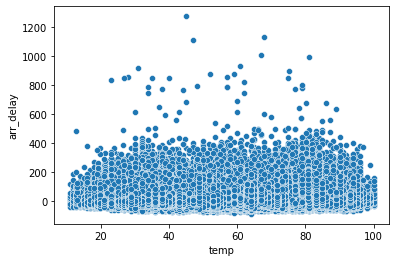

In [26]:
sns.scatterplot(x=data['temp'], y=data['arr_delay'])

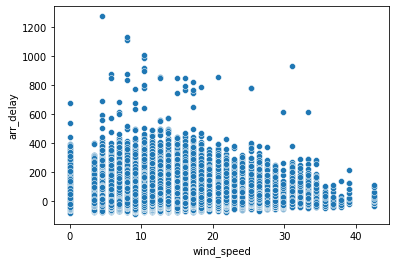

In [27]:
sns.scatterplot(x=data['wind_speed'], y=data['arr_delay'])

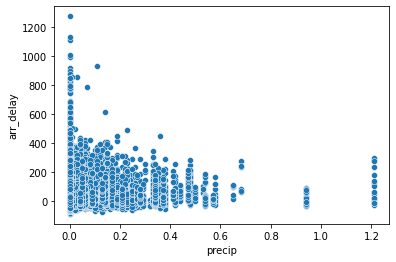

In [28]:
sns.scatterplot(x=data['precip'], y=data['arr_delay'])

In [29]:
data = data.drop(['arr_delay'], axis=1)

In [30]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['origin','carrier','dest','weekday','month']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(data[cat_cols]))
OH_cols.index = data.index
num_data = data.drop(cat_cols, axis=1)
data = pd.concat([num_data, OH_cols], axis=1)

In [31]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

y = data.delayed
X = data.drop(['delayed'], axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [ ]:
"""from sklearn.model_selection import cross_val_score

def model_test(lr):

  test_model = XGBClassifier(lr = lr)

  return cross_val_score(test_model, X, y, cv = 5, scoring='accuracy').mean()

results = []
for i in range(1,6):
  results.append(model_test(i*0.02))

plt.plot(range(1,6)*0.02, results)

# this is how I would tune parameters but I ran out of time"""

In [ ]:
"""# more basic way of doing the above cell - would change for a variety of parameters

for i in range(1,6):
  model = XGBClassifier(early_stopping_rounds=10, lr = i*0.04)
  model.fit(X_train, y_train)

  predictions = model.predict(X_train)

  print(accuracy_score(y_train, predictions))
  print(log_loss(y_train, predictions))"""

In [32]:
model = XGBClassifier(early_stopping_rounds=10, lr = 0.05)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=0, learning_rate=0.1, lr=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
              n_jobs=1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [33]:
from sklearn.metrics import accuracy_score, log_loss


predictions = model.predict(X_train)

print(accuracy_score(y_train, predictions))
print(log_loss(y_train, predictions))

0.7898420166480464
7.258616765856103
